# To predict the fight price according to departure and arrival stations.

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

# Loading Dataset 

In [2]:
df = pd.read_csv(r'C:\Users\ainak.YASWANTH\Desktop\Flight price prediction\Data_Train(open).csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As there are only two null values these won't effect the data as much hence we can drop them

In [5]:
df.dropna(inplace = True)

As we can see from the description that "Date_of_Journey", "Arrival_time", "Dep_time" and "Duration" are in object format we hav to convert them into datetime and time formats. As all the data is from same year "2019" there is no need to extract year coloumn 

In [6]:
df['Journey_day'] = pd.to_datetime(df.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [7]:
df['Journey_month'] = pd.to_datetime(df.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


As the coloumn "Date_of_Journey" is split, we can now drop the coloumn

In [9]:
df.drop(['Date_of_Journey'],axis = 1, inplace = True)

In [10]:
df["Dep_Hour"] = pd.to_datetime(df['Dep_Time']).dt.hour
df["Dep_Min"] = pd.to_datetime(df['Dep_Time']).dt.minute
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [11]:
df.drop(['Dep_Time'],axis = 1 ,inplace = True)

As the coloumn "Dep_Time" is split, we can now drop the coloumn

In [12]:
df["Arr_Hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arr_Min"] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


As the coloumn "Arrival_Time" is split, we can now drop the coloumn

In [13]:
df.drop(['Arrival_Time'],axis = 1 ,inplace = True)

# Extracting Duration Hours and Minutes 

In [14]:
dur=list(df['Duration'])
for i in range(len(dur)):
    if len(dur[i].split()) != 2:
        if 'h' in dur[i]:
            dur[i]=dur[i].strip()+' 0m'
        else:
            dur[i]='0h '+dur[i]
    
Dur_Hours=[]
Dur_Mins=[]
for i in range(len(dur)):
    Dur_Hours.append(int(dur[i].split(sep='h')[0]))
    Dur_Mins.append(int(dur[i].split(sep='m')[0].split()[-1]))

In [15]:
df['Dur_Hours'] = Dur_Hours
df['Dur_Mins'] = Dur_Mins
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hours,Dur_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


As the duration has been slipt into "duration_hours" and "minutes", we can now drop the colounm "Duration.

In [16]:
df.drop('Duration',axis = 1,inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hours,Dur_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data 

In [17]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

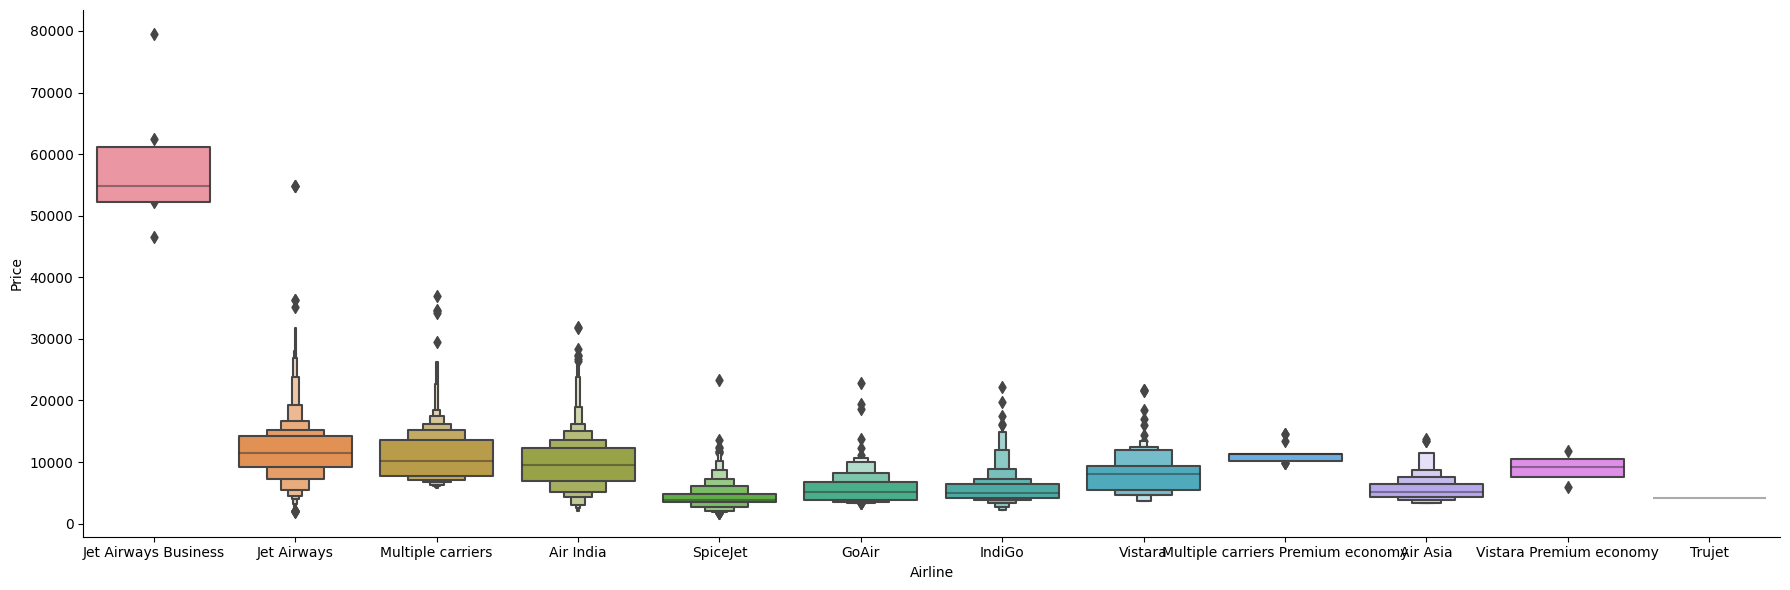

In [18]:
sns.catplot(x = 'Airline', y = 'Price', data = df.sort_values("Price", ascending = False), kind="boxen",height = 6,aspect = 3)

From this graph we can conclude that Jet Airwars Business prices are high compared to other airlines such as Jet Airways, Multiple Carriers, Air India and etc.
The prices of Jet Airways Business are between a little over Rupees 50k- a little over Rupees 60k.
Maximum of the flights have their prices between Rupees 5k-27k

In [19]:
# Performing OneHotEncoding on Airline as it is Nominal Categorical data.


Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [20]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

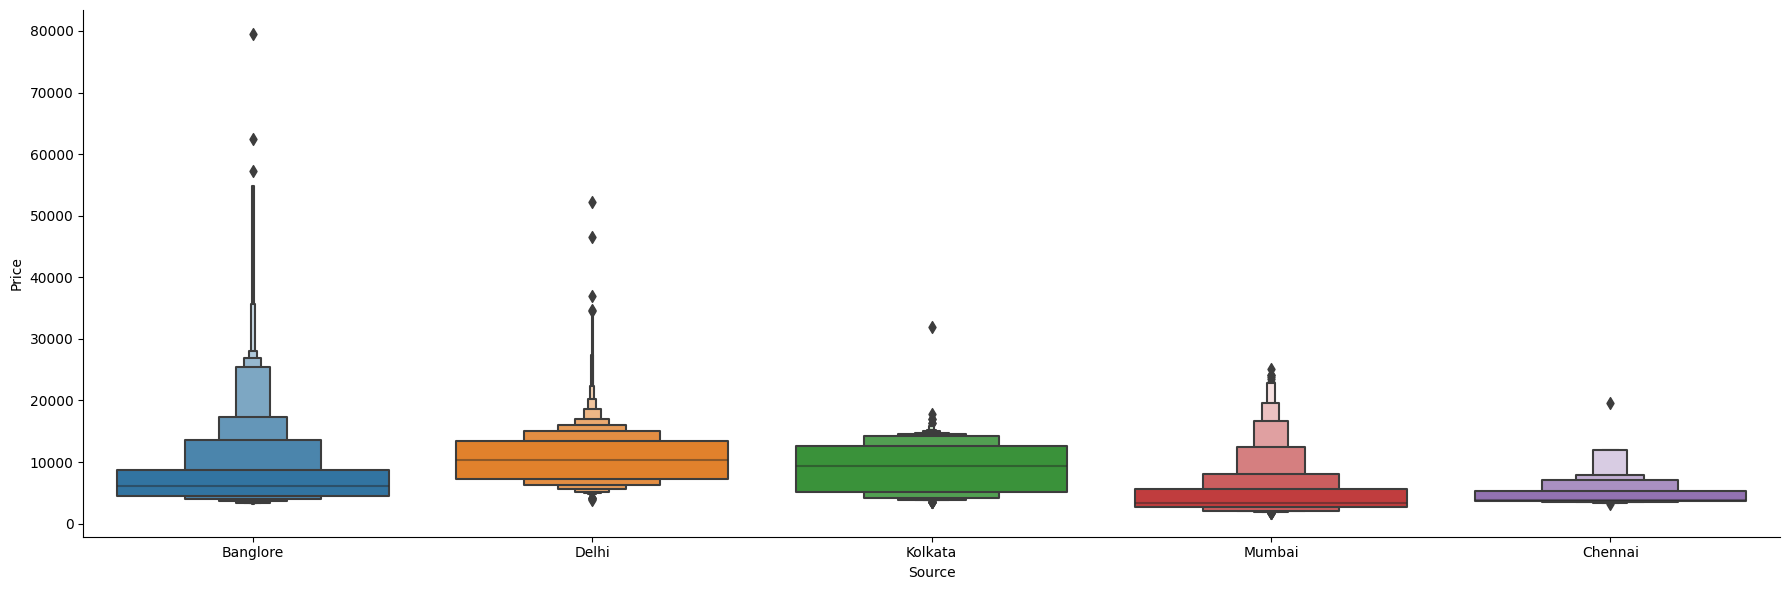

In [21]:
sns.catplot(x = 'Source', y = 'Price', data = df.sort_values("Price", ascending = False), kind="boxen",height = 6,aspect = 3)

From this graph we can see that passengers form Banglore are most compared to other sources individually.
Passengers form Delhi and Kolakata are almost similar and not as much as Bangalore individually.
Passengers from Mumbai and Chennai are almost similar, but the not many fly from these two locations as often as they do fly from Banglore, Delhi or Kolkata.


In [22]:
# Performing OneHotEncoding on Source as it is Nominal Categorical 

Source =  df[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [23]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

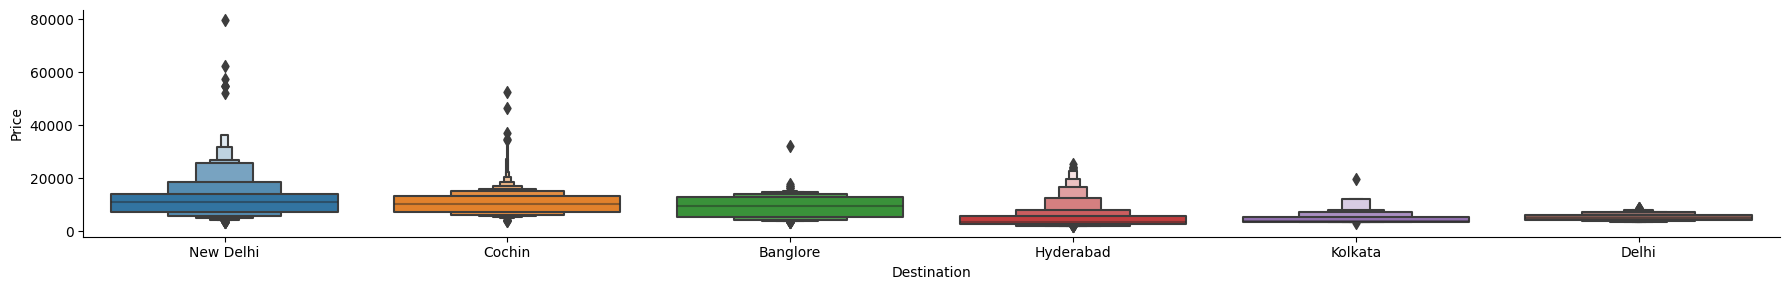

In [24]:
sns.catplot(x = 'Destination', y = 'Price', data = df.sort_values("Price", ascending = False), kind="boxen",height = 3,aspect = 6)

Most of the passengers fly to New Delhi compared to other locations individually.
Passengers who have chosen their destination as Cochin and Banglore are similar to eachother.
Passengers who chose their destination as Hyderabad are not as good as passengers who chose their destination as Banglore or Cochin.
Passengers who chose Kolkata or Delhi as thier destination are simillar but not many have chose to opt it as thier destination.

In [25]:
# Performing OneHotEncoding on Destination as it is Nominal Categorical 

Destination =  df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [26]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [27]:
df.drop(['Route','Additional_Info'],axis = 1, inplace = True)

In [28]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [29]:
df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hours,Dur_Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [30]:
df2 = pd.concat([df, Airline, Source, Destination], axis = 1)
df2.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Airline                                    10682 non-null  object
 1   Source                                     10682 non-null  object
 2   Destination                                10682 non-null  object
 3   Total_Stops                                10682 non-null  int64 
 4   Price                                      10682 non-null  int64 
 5   Journey_day                                10682 non-null  int64 
 6   Journey_month                              10682 non-null  int64 
 7   Dep_Hour                                   10682 non-null  int64 
 8   Dep_Min                                    10682 non-null  int64 
 9   Arr_Hour                                   10682 non-null  int64 
 10  Arr_Min                           

In [32]:
X = df2.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_Hour','Dep_Min', 'Arr_Hour', 'Arr_Min', 'Dur_Hours','Dur_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo','Airline_Jet Airways', 'Airline_Jet Airways Business','Airline_Multiple carriers','Airline_Multiple carriers Premium economy', 'Airline_SpiceJet','Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy','Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai','Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad','Destination_Kolkata', 'Destination_New Delhi']]
#X=df2.drop("Price",axis=1,inplace=True)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Dur_Hours,Dur_Mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#y = df2.iloc[:,4]
y = df2["Price"]
y.head(),

(0     3897
 1     7662
 2    13882
 3     6218
 4    13302
 Name: Price, dtype: int64,)

In [34]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 10682 entries, 0 to 10682
Series name: Price
Non-Null Count  Dtype
--------------  -----
10682 non-null  int64
dtypes: int64(1)
memory usage: 166.9 KB


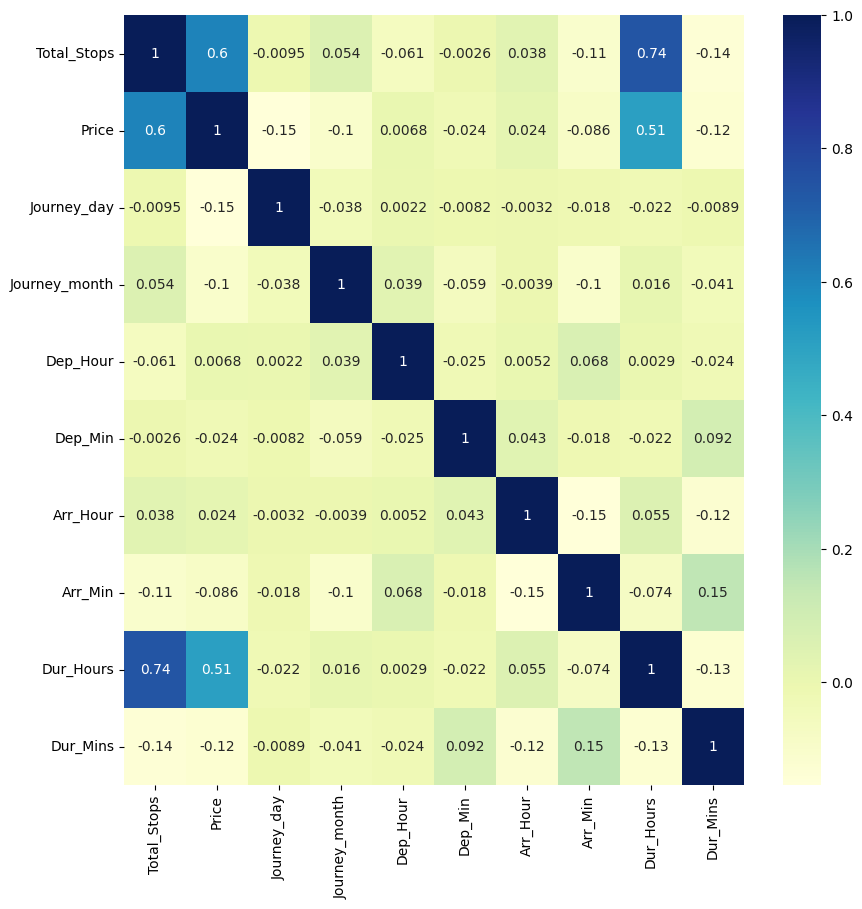

In [35]:
mp.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')
mp.show()

Looking at the heatmap shown above we can see that there is a strong relation between "Price" and "Total_Stops" with 0.6 correlation factor, and another strong relation between "Dur_Hours" and "Total_Stops" with 0.74 correlation factor.

# Important features using extratreeregressor

In [36]:
import sklearn

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()

In [38]:
selection.fit(X,y)

ExtraTreesRegressor()

In [39]:
print(selection.feature_importances_)

[2.05545046e-01 1.43967562e-01 5.30731195e-02 2.39998445e-02
 2.06780102e-02 2.79949386e-02 1.87829861e-02 1.43834100e-01
 1.77291301e-02 8.47340869e-03 1.83288389e-03 1.92382144e-02
 1.40353782e-01 6.82089192e-02 1.81432091e-02 8.67513438e-04
 3.07301133e-03 1.00567961e-04 4.56512933e-03 8.16122644e-05
 5.99975815e-04 1.33360189e-02 3.55225636e-03 6.31114411e-03
 8.88656121e-03 1.48848363e-02 6.51055439e-03 4.75371001e-04
 2.49002935e-02]


# Plotting the feature importances

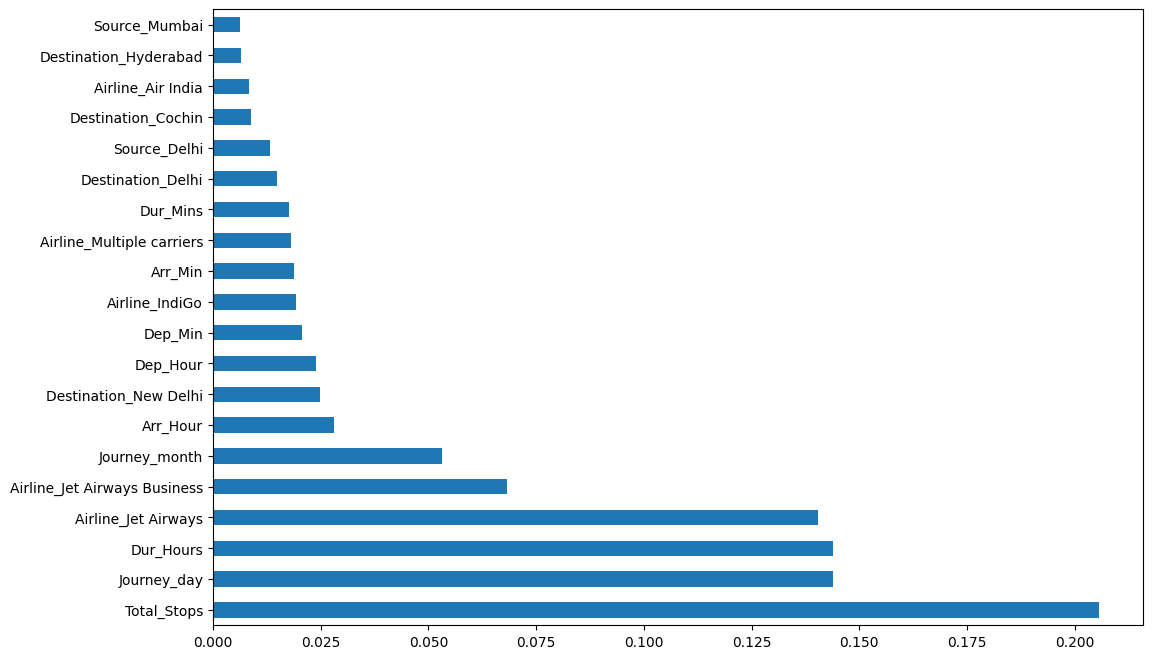

In [40]:
mp.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
mp.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 48)

In [42]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
y_pred = reg_rf.predict(X_test)

In [44]:
reg_rf.score(X_train,y_train)

0.9520425005436816

In [45]:
reg_rf.score(X_test,y_test)

0.7889904264680019

<AxesSubplot: xlabel='Price', ylabel='Density'>

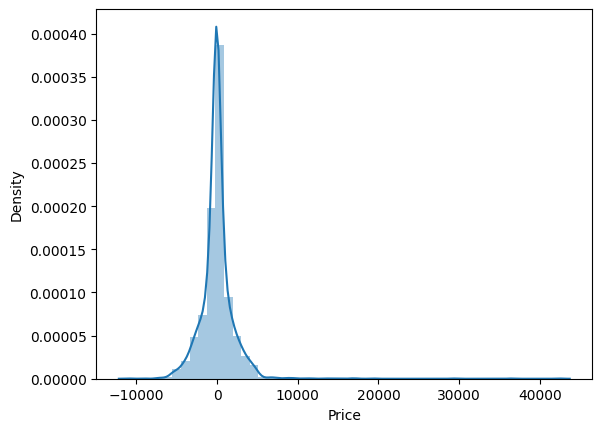

In [46]:
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'y_pred')

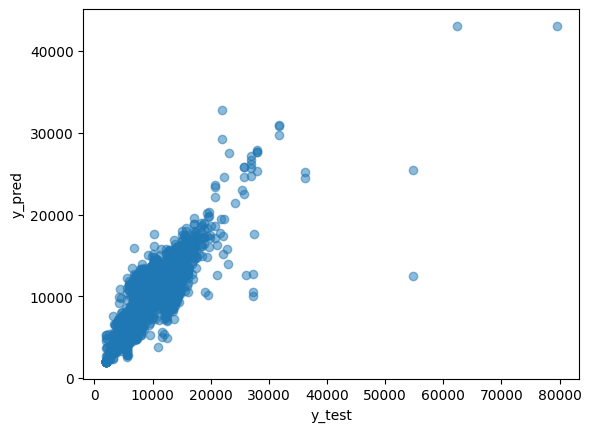

In [47]:
mp.scatter(y_test,y_pred,alpha = 0.5)
mp.xlabel("y_test")
mp.ylabel('y_pred')

The above scatter plot represents the prediction for the test data.

In [48]:
from sklearn import metrics

In [49]:
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE:  4883967.306291305
MAE:  1215.187438458205
RMSE: 2209.9699785950274


# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
n_estimators = [int(x) for x in np.linspace (start = 100, stop = 1200, num = 12)]
max_features = ['auto','squrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [52]:
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

In [53]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [54]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.1s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.2s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.1s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.1s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.1s
[CV] END max_depth=15, max_features=squrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END max_depth=15, max_features=squrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.1s
[CV] END max_depth=15, max_features=squrt, min_samples_leaf=2, min_samples_split=10, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'squrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [56]:
prediction = rf_random.predict(X_test)

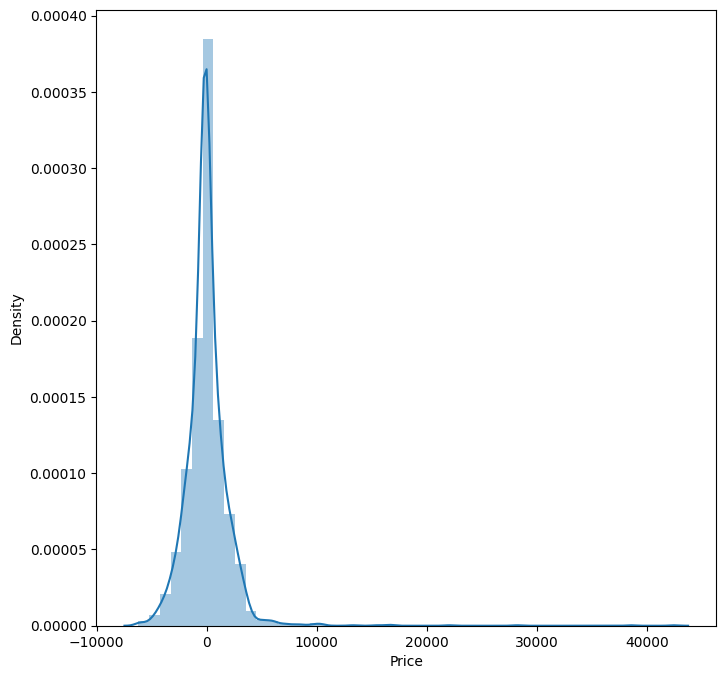

In [57]:
mp.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
mp.show()

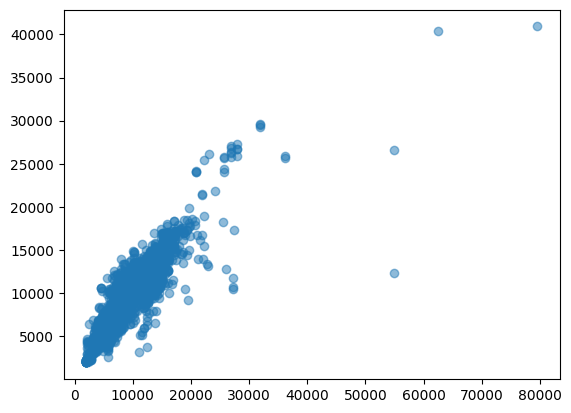

In [58]:
mp.scatter(y_test, prediction, alpha = 0.5)

In [59]:
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MSE:  4564654.778081015
MAE:  1211.9037243023688
RMSE: 2136.5052721865713


In [60]:
import pickle
with open ('flight_rf.pkl','wb') as f:
    pickle.dump(rf_random,f)

In [61]:
load_model = pickle.load(open("flight_rf.pkl",'rb'))
prediction = load_model.predict(X_test)
print(prediction)
prediction[0]

[12850.51343757  4087.83347718  5737.44172997 ...  4936.20261314
 12814.30461323 11738.85491109]


12850.513437573441

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test,prediction)

0.8027861781951449